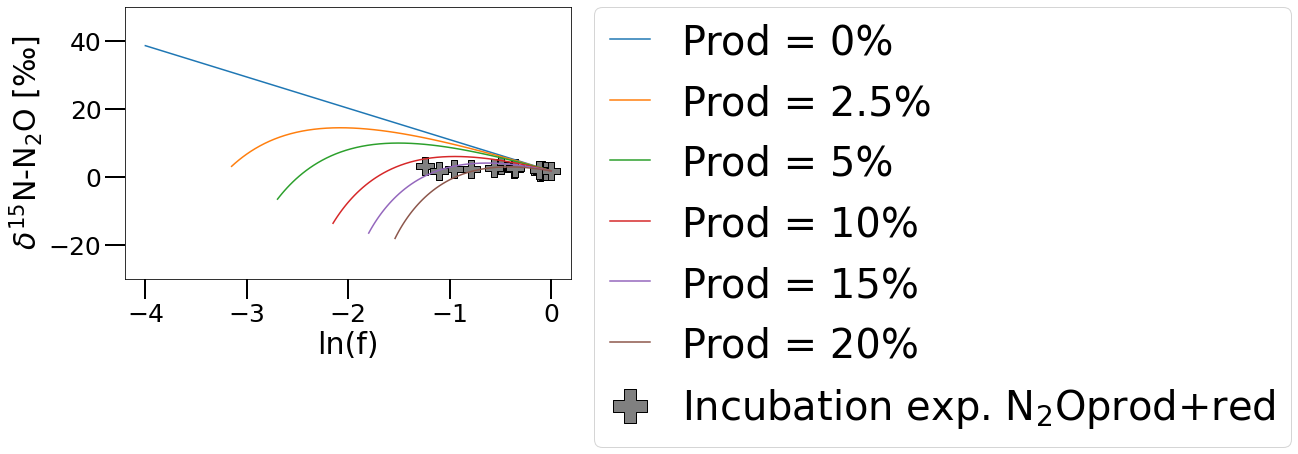

In [2]:
#################### for 15N bulk #################################################### using percentages



import numpy as np
import matplotlib.pyplot as plt

# Set global font sizes
plt.rcParams.update({
    "font.size": 14,  # Adjust font size globally
    "axes.labelsize": 18,  # Axis labels
    "axes.titlesize": 18,  # Title size
    "xtick.labelsize": 18,  # X-axis tick labels
    "ytick.labelsize": 18,  # Y-axis tick labels
    "legend.fontsize": 24,  # Legend font size
})

# Given constants
initial_N2O_pool = 490 # Initial N2O pool (nM)
d15N_initial = 1.8 # δ15N of initial N2O pool (‰)
e_N2Ored = 9.22  # Isotope effect for N2O reduction (‰)
initial_NO3_pool = 18.0  # Initial nitrate pool (nM)
NO3_residual = 13 # Residual nitrate (nM)


d15NO3_initial = 8.8 # δ15N of nitrate (‰)

e_N2Oprod = -38  # Isotope effect for N2O production (‰)

# Define ranges for iteration
ln_f_original_range = np.linspace(-4,0, 50)  # Example range from -1 to 0
perc_N2O_prod_values = [0, 2.5, 5, 10, 15, 20]  # Different percentages of N2O production

# In-situ data points
d15N_insitu = np.array([1.7,1.7,1.8,2.0,1.9,1.7,3.3,2.4,1.9,1.8,1.8,1.6,1.8,1.8,2.5,2.5,1.9,2.0,1.8,3.7,2.7,2.8])
ln_f_insitu = np.array([-0.02,-0.03,0.00,-0.09,-0.10,-0.07,-1.24,-0.79,-0.04,-0.03,0.00,-0.11,-0.09,-0.05,-0.37,-0.96,
                        -1.11,-0.12,0.00,-0.49,-0.56,-0.36])


# Plot setup
plt.figure(figsize=(8, 5))

# Loop through different percentages of N2O production
for perc_N2O_prod in perc_N2O_prod_values:
    d15N_results = []
    ln_f_new_results = []

    for ln_f_original in ln_f_original_range:
        f_N2O_original = np.exp(ln_f_original)  # Fraction remaining for reduced N2O

        # Residual N2O follows the Rayleigh equation (closed system for reduction)
        f_N2O_original = np.exp(ln_f_original)
        N2O_residual = initial_N2O_pool * f_N2O_original
        d15N_residual = d15N_initial - e_N2Ored * ln_f_original


        # Newly produced N2O from NO3, closed system
        f_NO3 = NO3_residual / initial_NO3_pool
        ln_f_NO3 = np.log(f_NO3)
        d15N_N2Oprod = d15NO3_initial - e_N2Oprod * ((f_NO3 * ln_f_NO3) / (1 - f_NO3))


        # **Calculate amount of new N2O based on percentage**
        new_N2O = (perc_N2O_prod / 100) * (initial_N2O_pool * (1 - f_N2O_original))  # Fixed % at any ln(f), % of N2O that was lost
        
        # Total N2O pool after production and reduction
        N2O_total = new_N2O + initial_N2O_pool * f_N2O_original
        ln_f_new = np.log(N2O_total / initial_N2O_pool)
        

        # Fraction of newly produced and residual N2O
        f_newly_prod = new_N2O / N2O_total  # Constant for each percentage
        f_residual = (initial_N2O_pool * f_N2O_original) / N2O_total

        # Mixing the two contributions to get the overall δ15N
        d15N_mix = f_newly_prod * d15N_N2Oprod + f_residual * d15N_residual
        
        if ln_f_new <= 0:  # Only include data where ln(f_new) <= 0
            d15N_results.append(d15N_mix)
            ln_f_new_results.append(ln_f_new)

    # Plot line for this N2O production percentage
    plt.plot(ln_f_new_results, d15N_results, label=f'Prod = {perc_N2O_prod}%')

# Plot in-situ data points
plt.scatter(ln_f_insitu, d15N_insitu, color='grey', marker='P', label="Incubation exp. N$_{2}$Oprod+red", edgecolor='black', linewidth=1, s=300)

# Labels and title
plt.xlabel("ln(f)", fontsize =30)
plt.ylabel("$\delta^{15}$N-N$_{2}$O [‰]", fontsize=30)
#plt.title("Simultaneous N2O Production and Reduction: \u03b415N_mix vs ln(f)_new")
plt.ylim(-30, 50)  # Set y-axis limits
plt.tick_params(axis='both', which='major', labelsize=25, length=20, width=2)
#plt.legend()
plt.grid(False)
# Adjust Legend
legend = plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0., 
                    markerscale=2, handleheight=1, handlelength=1, fontsize=40)

# **Increase line thickness in the legend**
#for line in legend.get_lines():
   # line.set_linewidth(7)  # Adjust thickness

# Show plot
plt.show()

In [ ]:
#################### for 15N bulk #################################################### using percentages



import numpy as np
import matplotlib.pyplot as plt

# Set global font sizes
plt.rcParams.update({
    "font.size": 14,  # Adjust font size globally
    "axes.labelsize": 18,  # Axis labels
    "axes.titlesize": 18,  # Title size
    "xtick.labelsize": 18,  # X-axis tick labels
    "ytick.labelsize": 18,  # Y-axis tick labels
    "legend.fontsize": 24,  # Legend font size
})

# Given constants
initial_N2O_pool = 490 # Initial N2O pool (nM)
d15N_initial = 1.8 # δ15N of initial N2O pool (‰)
e_N2Ored = 9.22  # Isotope effect for N2O reduction (‰)
initial_NO3_pool = 18.0  # Initial nitrate pool (nM)
NO3_residual = 13 # Residual nitrate (nM)


d15NO3_initial = 8.8 # δ15N of nitrate (‰)

e_N2Oprod = -38  # Isotope effect for N2O production (‰)

# Define ranges for iteration
ln_f_original_range = np.linspace(-4,0, 50)  # Example range from -1 to 0
perc_N2O_prod_values = [0, 2.5, 5, 10, 15, 20,30]  # Different percentages of N2O production

# In-situ data points
d15N_insitu = np.array([1.7,1.7,1.8,2.0,1.9,1.7,3.3,2.4,1.9,1.8,1.8,1.6,1.8,1.8,2.5,2.5,1.9,2.0,1.8,3.7,2.7,2.8])
ln_f_insitu = np.array([-0.02,-0.03,0.00,-0.09,-0.10,-0.07,-1.24,-0.79,-0.04,-0.03,0.00,-0.11,-0.09,-0.05,-0.37,-0.96,
                        -1.11,-0.12,0.00,-0.49,-0.56,-0.36])


# Plot setup
plt.figure(figsize=(8, 5))

# Loop through different percentages of N2O production
for perc_N2O_prod in perc_N2O_prod_values:
    d15N_results = []
    ln_f_new_results = []

    for ln_f_original in ln_f_original_range:
        f_N2O_original = np.exp(ln_f_original)  # Fraction remaining for reduced N2O

        # Residual N2O follows the Rayleigh equation (closed system for reduction)
        f_N2O_original = np.exp(ln_f_original)
        N2O_residual = initial_N2O_pool * f_N2O_original
        d15N_residual = d15N_initial - e_N2Ored * ln_f_original


        # Newly produced N2O from NO3, closed system
        f_NO3 = NO3_residual / initial_NO3_pool
        ln_f_NO3 = np.log(f_NO3)
        d15N_N2Oprod = d15NO3_initial - e_N2Oprod * ((f_NO3 * ln_f_NO3) / (1 - f_NO3))


        # **Calculate amount of new N2O based on percentage**
        new_N2O = (perc_N2O_prod / 100) * (initial_N2O_pool * (1 - f_N2O_original))  # Fixed % at any ln(f), % of N2O that was lost
        
        # Total N2O pool after production and reduction
        N2O_total = new_N2O + initial_N2O_pool * f_N2O_original
        ln_f_new = np.log(N2O_total / initial_N2O_pool)
        

        # Fraction of newly produced and residual N2O
        f_newly_prod = new_N2O / N2O_total  # Constant for each percentage
        f_residual = (initial_N2O_pool * f_N2O_original) / N2O_total

        # Mixing the two contributions to get the overall δ15N
        d15N_mix = f_newly_prod * d15N_N2Oprod + f_residual * d15N_residual
        
        if ln_f_new <= 0:  # Only include data where ln(f_new) <= 0
            d15N_results.append(d15N_mix)
            ln_f_new_results.append(ln_f_new)

    # Plot line for this N2O production percentage
    plt.plot(ln_f_new_results, d15N_results, label=f'Prod = {perc_N2O_prod}%')

# Plot in-situ data points
plt.scatter(ln_f_insitu, d15N_insitu, color='grey', marker='P', label="Incubation exp. N$_{2}$Oprod+red", edgecolor='black', linewidth=1, s=300)

# Labels and title
plt.xlabel("ln(f)", fontsize =30)
plt.ylabel("$\delta^{15}$N-N$_{2}$O [‰]", fontsize=30)
#plt.title("Simultaneous N2O Production and Reduction: \u03b415N_mix vs ln(f)_new")
plt.ylim(-30, 50)  # Set y-axis limits
plt.tick_params(axis='both', which='major', labelsize=25, length=20, width=2)
#plt.legend()
plt.grid(False)
# Adjust Legend
#legend = plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0., 
                  #  markerscale=2, handleheight=1, handlelength=1, fontsize=40)

# **Increase line thickness in the legend**
#for line in legend.get_lines():
   # line.set_linewidth(7)  # Adjust thickness

# Show plot
plt.show()

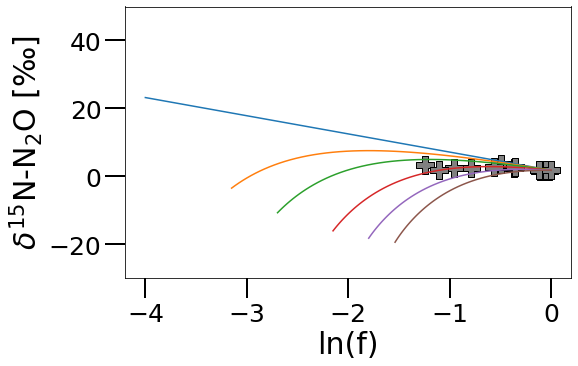

In [3]:
#################### for 15N bulk #################################################### using percentages



import numpy as np
import matplotlib.pyplot as plt

# Set global font sizes
plt.rcParams.update({
    "font.size": 14,  # Adjust font size globally
    "axes.labelsize": 18,  # Axis labels
    "axes.titlesize": 18,  # Title size
    "xtick.labelsize": 18,  # X-axis tick labels
    "ytick.labelsize": 18,  # Y-axis tick labels
    "legend.fontsize": 24,  # Legend font size
})

# Given constants
initial_N2O_pool = 490 # Initial N2O pool (nM)
d15N_initial = 1.8 # δ15N of initial N2O pool (‰)
e_N2Ored = 5.35  # Isotope effect for N2O reduction (‰)
initial_NO3_pool = 18.0  # Initial nitrate pool (nM)
NO3_residual = 13 # Residual nitrate (nM)


d15NO3_initial = 8.8 # δ15N of nitrate (‰)

e_N2Oprod = -38  # Isotope effect for N2O production (‰)

# Define ranges for iteration
ln_f_original_range = np.linspace(-4,0, 50)  # Example range from -1 to 0
perc_N2O_prod_values = [0, 2.5, 5, 10, 15, 20]  # Different percentages of N2O production

# In-situ data points
d15N_insitu = np.array([1.7,1.7,1.8,2.0,1.9,1.7,3.3,2.4,1.9,1.8,1.8,1.6,1.8,1.8,2.5,2.5,1.9,2.0,1.8,3.7,2.7,2.8])
ln_f_insitu = np.array([-0.02,-0.03,0.00,-0.09,-0.10,-0.07,-1.24,-0.79,-0.04,-0.03,0.00,-0.11,-0.09,-0.05,-0.37,-0.96,
                        -1.11,-0.12,0.00,-0.49,-0.56,-0.36])


# Plot setup
plt.figure(figsize=(8, 5))

# Loop through different percentages of N2O production
for perc_N2O_prod in perc_N2O_prod_values:
    d15N_results = []
    ln_f_new_results = []

    for ln_f_original in ln_f_original_range:
        f_N2O_original = np.exp(ln_f_original)  # Fraction remaining for reduced N2O

        # Residual N2O follows the Rayleigh equation (closed system for reduction)
        f_N2O_original = np.exp(ln_f_original)
        N2O_residual = initial_N2O_pool * f_N2O_original
        d15N_residual = d15N_initial - e_N2Ored * ln_f_original


        # Newly produced N2O from NO3, closed system
        f_NO3 = NO3_residual / initial_NO3_pool
        ln_f_NO3 = np.log(f_NO3)
        d15N_N2Oprod = d15NO3_initial - e_N2Oprod * ((f_NO3 * ln_f_NO3) / (1 - f_NO3))


        # **Calculate amount of new N2O based on percentage**
        new_N2O = (perc_N2O_prod / 100) * (initial_N2O_pool * (1 - f_N2O_original))  # Fixed % at any ln(f), % of N2O that was lost
        
        # Total N2O pool after production and reduction
        N2O_total = new_N2O + initial_N2O_pool * f_N2O_original
        ln_f_new = np.log(N2O_total / initial_N2O_pool)
        

        # Fraction of newly produced and residual N2O
        f_newly_prod = new_N2O / N2O_total  # Constant for each percentage
        f_residual = (initial_N2O_pool * f_N2O_original) / N2O_total

        # Mixing the two contributions to get the overall δ15N
        d15N_mix = f_newly_prod * d15N_N2Oprod + f_residual * d15N_residual
        
        if ln_f_new <= 0:  # Only include data where ln(f_new) <= 0
            d15N_results.append(d15N_mix)
            ln_f_new_results.append(ln_f_new)

    # Plot line for this N2O production percentage
    plt.plot(ln_f_new_results, d15N_results, label=f'Prod = {perc_N2O_prod}%')

# Plot in-situ data points
plt.scatter(ln_f_insitu, d15N_insitu, color='grey', marker='P', label="Incubation exp. N$_{2}$Oprod+red", edgecolor='black', linewidth=1, s=300)

# Labels and title
plt.xlabel("ln(f)", fontsize =30)
plt.ylabel("$\delta^{15}$N-N$_{2}$O [‰]", fontsize=30)
#plt.title("Simultaneous N2O Production and Reduction: \u03b415N_mix vs ln(f)_new")
plt.ylim(-30, 50)  # Set y-axis limits
plt.tick_params(axis='both', which='major', labelsize=25, length=20, width=2)
#plt.legend()
plt.grid(False)
# Adjust Legend
#legend = plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0., 
                  #  markerscale=2, handleheight=1, handlelength=1, fontsize=40)

# **Increase line thickness in the legend**
#for line in legend.get_lines():
   # line.set_linewidth(7)  # Adjust thickness

# Show plot
plt.show()

In [ ]:
#################### for 15N bulk #################################################### using percentages



import numpy as np
import matplotlib.pyplot as plt

# Set global font sizes
plt.rcParams.update({
    "font.size": 14,  # Adjust font size globally
    "axes.labelsize": 18,  # Axis labels
    "axes.titlesize": 18,  # Title size
    "xtick.labelsize": 18,  # X-axis tick labels
    "ytick.labelsize": 18,  # Y-axis tick labels
    "legend.fontsize": 24,  # Legend font size
})

# Given constants
initial_N2O_pool = 490 # Initial N2O pool (nM)
d15N_initial = 1.8 # δ15N of initial N2O pool (‰)
e_N2Ored = 5.35  # Isotope effect for N2O reduction (‰)
initial_NO3_pool = 18.0  # Initial nitrate pool (nM)
NO3_residual = 13 # Residual nitrate (nM)


d15NO3_initial = 8.8 # δ15N of nitrate (‰)

e_N2Oprod = -10  # Isotope effect for N2O production (‰)

# Define ranges for iteration
ln_f_original_range = np.linspace(-4,0, 50)  # Example range from -1 to 0
perc_N2O_prod_values = [0, 2.5, 5, 10, 15, 20,30]  # Different percentages of N2O production

# In-situ data points
d15N_insitu = np.array([1.7,1.7,1.8,2.0,1.9,1.7,3.3,2.4,1.9,1.8,1.8,1.6,1.8,1.8,2.5,2.5,1.9,2.0,1.8,3.7,2.7,2.8])
ln_f_insitu = np.array([-0.02,-0.03,0.00,-0.09,-0.10,-0.07,-1.24,-0.79,-0.04,-0.03,0.00,-0.11,-0.09,-0.05,-0.37,-0.96,
                        -1.11,-0.12,0.00,-0.49,-0.56,-0.36])


# Plot setup
plt.figure(figsize=(8, 5))

# Loop through different percentages of N2O production
for perc_N2O_prod in perc_N2O_prod_values:
    d15N_results = []
    ln_f_new_results = []

    for ln_f_original in ln_f_original_range:
        f_N2O_original = np.exp(ln_f_original)  # Fraction remaining for reduced N2O

        # Residual N2O follows the Rayleigh equation (closed system for reduction)
        f_N2O_original = np.exp(ln_f_original)
        N2O_residual = initial_N2O_pool * f_N2O_original
        d15N_residual = d15N_initial - e_N2Ored * ln_f_original


        # Newly produced N2O from NO3, closed system
        f_NO3 = NO3_residual / initial_NO3_pool
        ln_f_NO3 = np.log(f_NO3)
        d15N_N2Oprod = d15NO3_initial - e_N2Oprod * ((f_NO3 * ln_f_NO3) / (1 - f_NO3))


        # **Calculate amount of new N2O based on percentage**
        new_N2O = (perc_N2O_prod / 100) * (initial_N2O_pool * (1 - f_N2O_original))  # Fixed % at any ln(f), % of N2O that was lost
        
        # Total N2O pool after production and reduction
        N2O_total = new_N2O + initial_N2O_pool * f_N2O_original
        ln_f_new = np.log(N2O_total / initial_N2O_pool)
        

        # Fraction of newly produced and residual N2O
        f_newly_prod = new_N2O / N2O_total  # Constant for each percentage
        f_residual = (initial_N2O_pool * f_N2O_original) / N2O_total

        # Mixing the two contributions to get the overall δ15N
        d15N_mix = f_newly_prod * d15N_N2Oprod + f_residual * d15N_residual
        
        if ln_f_new <= 0:  # Only include data where ln(f_new) <= 0
            d15N_results.append(d15N_mix)
            ln_f_new_results.append(ln_f_new)

    # Plot line for this N2O production percentage
    plt.plot(ln_f_new_results, d15N_results, label=f'Prod = {perc_N2O_prod}%')

# Plot in-situ data points
plt.scatter(ln_f_insitu, d15N_insitu, color='grey', marker='P', label="Incubation exp. N$_{2}$Oprod+red", edgecolor='black', linewidth=1, s=300)

# Labels and title
plt.xlabel("ln(f)", fontsize =30)
plt.ylabel("$\delta^{15}$N-N$_{2}$O [‰]", fontsize=30)
#plt.title("Simultaneous N2O Production and Reduction: \u03b415N_mix vs ln(f)_new")
plt.ylim(-30, 50)  # Set y-axis limits
plt.tick_params(axis='both', which='major', labelsize=25, length=20, width=2)
#plt.legend()
plt.grid(False)
# Adjust Legend
#legend = plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0., 
                  #  markerscale=2, handleheight=1, handlelength=1, fontsize=40)

# **Increase line thickness in the legend**
#for line in legend.get_lines():
   # line.set_linewidth(7)  # Adjust thickness

# Show plot
plt.show()